In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [8]:
iris_x, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_x, iris_y, test_size = 0.33, random_state = 42)

In [12]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

X = tf.placeholder(tf.float32, [None, numFeatures])
yPred = tf.placeholder(tf.float32, [None, numLabels])

In [10]:
#Randomly sample from a normal distribution withstandard deviation 0.01
weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                      mean = 0,
                                      stddev = 0.01,
                                      name = 'weights'))

bias = tf.Variable(tf.random_normal([1, numLabels],
                                   mean = 0,
                                   stddev = 0.01,
                                   name = 'bias'))


In [14]:
#Three component breakdown of the Logistic Regression equation
apply_weights_OP = tf.matmul(X, weights, name='apply_weights')
add_bias_OP = tf.add(apply_weights_OP, bias, name='add_bias')
activation_OP = tf.nn.sigmoid(add_bias_OP, name='activation')

In [15]:
numEpochs = 700
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                         global_step = 1,
                                         decay_steps=trainX.shape[0],
                                         decay_rate=0.95,
                                         staircase=True)

In [16]:
#Define cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yPred, name="squared_error_cost")

#Define gradient descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [17]:
sess = tf.Session()

init_OP = tf.global_variables_initializer()

sess.run(init_OP)

In [18]:
correct_predictions_OP =tf.equal(tf.argmax(activation_OP,1),tf.argmax(yPred,1))

accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, 'float'))

activation_summary_OP = tf.summary.histogram('output', activation_OP)

accuracy_summary_OP = tf.summary.scalar('accuracy',accuracy_OP)

cost_summary_OP = tf.summary.scalar('cost',cost_OP)

weightSummary = tf.summary.histogram('weights', weights.eval(session=sess))

biasSummary = tf.summary.histogram('biases', bias.eval(session=sess))

merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

writer = tf.summary.FileWriter('summary_logs', sess.graph)

In [21]:
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; covergence."%diff)
        break
    else:
        step = sess.run(training_OP, feed_dict={X: trainX, yPred:trainY})
        
        if i%10 == 0:
            epoch_values.append(i)
            
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yPred: trainY} )
            
            accuracy_values.append(train_accuracy)
            
            cost_values.append(newCost)
            
            diff = abs(newCost - cost)
            cost = newCost
            
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))
            
            
#Prediction
print("final accuracy on test set: %s"%str(sess.run(accuracy_OP,
                                                   feed_dict={X:testX,
                                                             yPred:testY})))
            
        

step 0, training accuracy 0.909091, cost 14.834, change in cost 14.834
step 10, training accuracy 0.909091, cost 14.8018, change in cost 0.0322189
step 20, training accuracy 0.909091, cost 14.7701, change in cost 0.0317268
step 30, training accuracy 0.909091, cost 14.7388, change in cost 0.031251
step 40, training accuracy 0.909091, cost 14.7081, change in cost 0.0307817
step 50, training accuracy 0.909091, cost 14.6777, change in cost 0.0303316
step 60, training accuracy 0.909091, cost 14.6478, change in cost 0.0298901
step 70, training accuracy 0.909091, cost 14.6184, change in cost 0.0294619
step 80, training accuracy 0.909091, cost 14.5893, change in cost 0.0290451
step 90, training accuracy 0.909091, cost 14.5607, change in cost 0.028635
step 100, training accuracy 0.909091, cost 14.5325, change in cost 0.0282402
step 110, training accuracy 0.909091, cost 14.5046, change in cost 0.0278511
step 120, training accuracy 0.909091, cost 14.4771, change in cost 0.0274725
step 130, traini

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


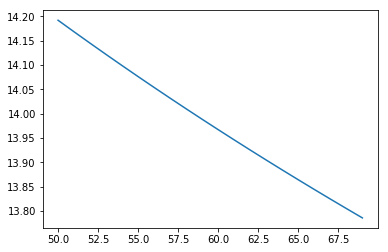

In [22]:
%matplotlib inline

plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()